In [16]:
import math
from scipy.optimize import fsolve, newton
import numpy as np
import random
import sys, os

sys.path.append(os.path.abspath("/Users/hpathak/expedia/deep/NPACS/arc"))
from utils import *
from solvers import *

## Objectives

### 1. Observe and Detect bifurcation points 


#### How to detect Bifurcation points: 

- For a partial differentiable function
- At the bifurcation, Implicit Function Theorem  may not hold. 
    At the very same point, Jacobian is not invertible. Hence there could be a problem of  vanishing gradient, as already seen in RNNs. 
- Determinant of the Jacobian matrix is zero. 
    - Your N+1 dimension space is not full rank or it is less than N+1, worst case could be “zero”
    - This is also referred as singularities in the homotopy path. Because Jacobian is singular. 
- If we have a sign watcher for sign( det(J) ), then we can say whenever the sign is flipped function has gone through a bifurcation point, in its continuation scheme or homotopy path.
- Intuitively, what is Bifurcation? : 
    - Change in state behavior, something happens, an abrupt qualitative change
     - Bifurcation point is yet another fixed point 
- Typically a new solution develops at this point. In other words, a new solution bifurcates from the original solution path, given a small change in initial value -- LOCALLY. 


### 2. Pseudo Arclength Continuation 



Understanding it step by step: 

- Formulate the problem (cost funcition) as homotopy 
\begin{align}  J(\theta, , \lambda) \end{align}
- Now I found 2 ways for arc-length method, 
    - Predictor : Secant step 
    - Corrector : Obejctive is to fall back to the curve in small number of steps,
        - gradient Descet steps or ADAM steps  
        - with N+1 dimensional Sphere constraint 
            \begin{equation}|| \Delta \theta ||^{2} + |\Delta \lambda| = 1 \end{equation}
        - with Orthogonal constraint 
            \begin{equation}  \theta^{p}_{i+1} = \theta_i + (secant\_step) \cdot Jacobian(\theta_i)  \end{equation} 
            \begin{equation} \Delta \theta \cdot Jacobian(\theta_i)    = 0  \end{equation} 
            \begin{align} => (\theta_{i+1} - \theta^{p}_{i+1} ) \cdot Jacobian(\theta_i)    = 0  \end{align}

## GAS Variables Experiment


/Users/hpathak/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/hpathak/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


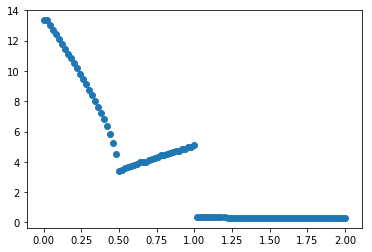

In [17]:
l = get_l(minor=0, major=2, delta_l=0.02, rev=rev)
solutions = np_solver(gas_h, v_0, l)
plot_solutions(l,solutions)

In [3]:
points, signs, values = detect_bifurcation_static(solutions)
print(points[0][1:])

[51]


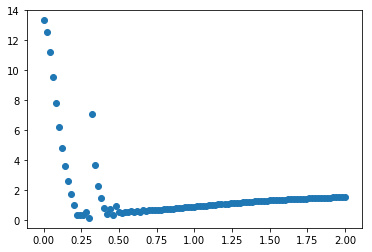

In [32]:
l = get_l(minor=0, major=2, delta_l=0.02, rev=rev)
solutions = grad_solver(v_0, l,lr=6e-2)
plot_solutions(l,solutions)

In [30]:
points, signs, values = detect_bifurcation_static(solutions)
print(points[0][:])

[11 16 20 24 25 50 54]


In [29]:
for c, val in enumerate(values):
    print(c,val)

0 -533
1 -472
2 -376
3 -272
4 -183
5 -115
6 -69
7 -39
8 -20
9 -9
10 -1
11 49
12 40
13 50
14 12
15 416
16 -151
17 -40
18 -16
19 -6
20 1
21 31
22 4
23 36
24 0
25 13
26 14
27 10
28 13
29 8
30 12
31 6
32 9
33 6
34 7
35 6
36 6
37 5
38 5
39 4
40 4
41 3
42 3
43 2
44 2
45 2
46 1
47 1
48 1
49 1
50 0
51 0
52 0
53 0
54 -1
55 -1
56 -1
57 -1
58 -2
59 -2
60 -2
61 -2
62 -2
63 -3
64 -3
65 -3
66 -3
67 -3
68 -3
69 -3
70 -4
71 -4
72 -4
73 -4
74 -4
75 -4
76 -4
77 -5
78 -5
79 -5
80 -5
81 -5
82 -5
83 -5
84 -5
85 -5
86 -5
87 -6
88 -6
89 -6
90 -6
91 -6
92 -6
93 -6
94 -6
95 -6
96 -6
97 -6
98 -6
99 -6
100 -7


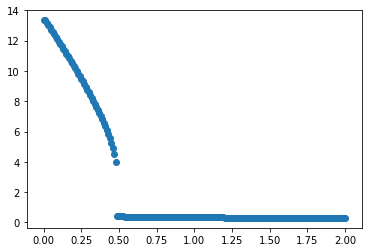

In [2]:
l = get_l(minor=0, major=2, delta_l=0.01, rev=rev)
solutions = newton_solver(gas_h, v_0, l)
plot_solutions(l,solutions)

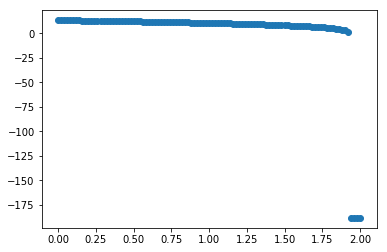

In [32]:
l = get_l(minor=0, major=2, delta_l=0.02, rev=rev)
solutions = newton_raphson_solver(gas_h, gas_h_jacobian, v_0, l,lr=19.5)
plot_solutions(l,solutions)